In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
print('target_names: {}'.format(cancer['target_names']))

target_names: ['malignant' 'benign']


In [5]:
cancer['data'].shape

(569, 30)

In [6]:
cancer['target'].shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state = 70)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
#now we want to select 'K' with optimal accuracy
train_accu = []
test_accu = [] # create empty lists
n_setting = range(1,11) # test from K = 1 to K = 10

for n_neighbors in n_setting:
    mod = KNeighborsClassifier(n_neighbors=n_neighbors)
    mod.fit(X_train,y_train) # train each model
    train_accu.append(mod.score(X_train, y_train)) # record training accuracy
    test_accu.append(mod.score(X_test,y_test)) # record testing accuracy

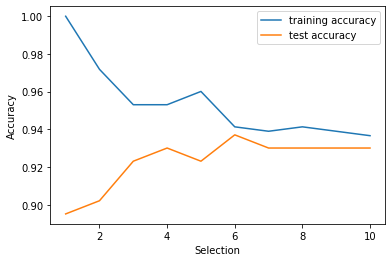

In [11]:
# visualize
import matplotlib.pyplot as plt
plt.plot(n_setting, train_accu, label = 'training accuracy')
plt.plot(n_setting, test_accu, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Selection')
plt.legend()